In [34]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

#df = pd.read_csv("NYC_Collisions.csv", parse_dates=["Date"], index_col ="Date")
df = pd.read_csv("NYC_Collisions.csv")
# CONCAT TWO COLUMNS
df["DateTime"] = df["Date"]+" "+df["Time"]
# PARSE DATATIME
df["DateTime"] = pd.to_datetime(df["DateTime"])
print(df.columns)
print("\n------------\n")
print(df.info())
print("\n------------\n")
print(df.iloc[0])
print("\n------------\n")
print("Null Date ", df['Date'].isnull().sum())
print("Null Time ", df['Time'].isnull().sum())
print("Null Borough ", df['Borough'].isnull().sum())
print("Null Latitude ", df['Latitude'].isnull().sum())
print("Null Longitude ", df['Longitude'].isnull().sum())
print("Null Contributing Factor ", df['Contributing Factor'].isnull().sum())
print("Null Vehicle Type ", df['Vehicle Type'].isnull().sum())
print("\n------------\n")
# DROP COLUMN
print("\nDROP COLUMN\n")
df.drop(["Cross Street"], axis =1, inplace = True)
print(df.info())
print("\n------------\n")
# DROP NULL
print("\nDROP NULL\n")
df.dropna(inplace=True)
print(df.info())
print("\n------------\n")
print(df.iloc[0])

Index(['Collision ID', 'Date', 'Time', 'Borough', 'Street Name',
       'Cross Street', 'Latitude', 'Longitude', 'Contributing Factor',
       'Vehicle Type', 'Persons Injured', 'Persons Killed',
       'Pedestrians Injured', 'Pedestrians Killed', 'Cyclists Injured',
       'Cyclists Killed', 'Motorists Injured', 'Motorists Killed', 'DateTime'],
      dtype='object')

------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238421 entries, 0 to 238420
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Collision ID         238421 non-null  int64         
 1   Date                 238421 non-null  object        
 2   Time                 238421 non-null  object        
 3   Borough              231224 non-null  object        
 4   Street Name          238058 non-null  object        
 5   Cross Street         111291 non-null  object        
 6   Latitude             216098 non-nul

In [35]:
# df.groupby(pd.Grouper(key='Date', freq='2YE')).sum()
# df.plot(kind = 'scatter', x = 'Date', y = 'Persons Killed')
# plt.show()
# df["Date"] = pd.to_datetime(df["Date"])
# df["Date"].head
# df2 = df.groupby(pd.Grouper(key='Date', freq='YE'))
# df.plot(x = 'Date', y = 'Persons Killed', figsize=(20, 10))
# plt.title('Scatter Plot')
# plt.show()
# df2 = killed_date.groupby(pd.Grouper(key='Date', freq='ME'))
# df2 = df.groupby([df.index.year])["Persons Killed"].sum()
# print(df.shape)
# df2 = df[["Date", "Persons Killed"]]
# print(df2.shape)
# df3 = df["Date"]
# print(df3.shape)
# df2.info()
# df.Date.info()

# print(persons_killed.shape)
# print(persons_killed)
# persons_killed.info()
borough = df.groupby(df["Borough"])["Borough"]
borough.describe()

,count,unique,top,freq
Borough,,,,
Bronx,37480,1,Bronx,37480
Brooklyn,72421,1,Brooklyn,72421
Manhattan,35691,1,Manhattan,35691
Queens,58644,1,Queens,58644
Staten Island,10361,1,Staten Island,10361


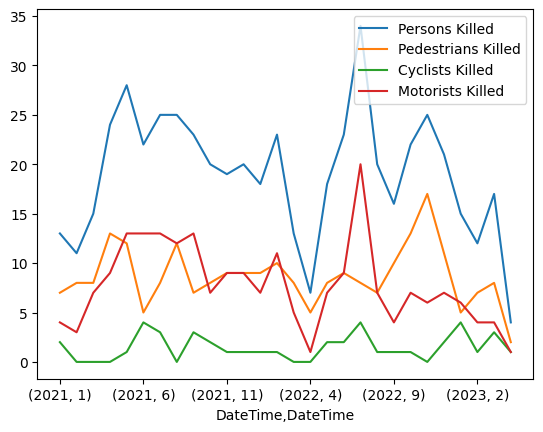

In [36]:
persons_killed = df.groupby([df["DateTime"].dt.year, df["DateTime"].dt.month])["Persons Killed"].sum()
pedestrians_killed = df.groupby([df["DateTime"].dt.year, df["DateTime"].dt.month])["Pedestrians Killed"].sum()
cyclists_killed = df.groupby([df["DateTime"].dt.year, df["DateTime"].dt.month])["Cyclists Killed"].sum()
motorists_killed = df.groupby([df["DateTime"].dt.year, df["DateTime"].dt.month])["Motorists Killed"].sum()

persons_killed.plot(x='Date', y='Persons Killed', legend=True)
pedestrians_killed.plot(x='Date', y='Pedestrians Killed', legend=True)
cyclists_killed.plot(x='Date', y='Pedestrians Killed', legend=True)
motorists_killed.plot(x='Date', y='Motorists Killed', legend=True)
plt.show()

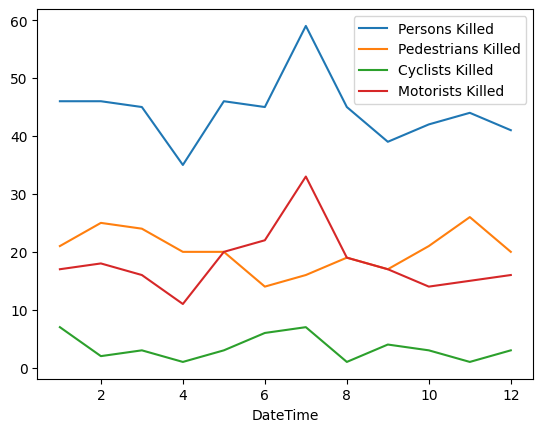

In [37]:
persons_killed = df.groupby([df["DateTime"].dt.month])["Persons Killed"].sum()
pedestrians_killed = df.groupby([df["DateTime"].dt.month])["Pedestrians Killed"].sum()
cyclists_killed = df.groupby([df["DateTime"].dt.month])["Cyclists Killed"].sum()
motorists_killed = df.groupby([df["DateTime"].dt.month])["Motorists Killed"].sum()

persons_killed.plot(x='Date', y='Persons Killed', legend=True)
pedestrians_killed.plot(x='Date', y='Pedestrians Killed', legend=True)
cyclists_killed.plot(x='Date', y='Pedestrians Killed', legend=True)
motorists_killed.plot(x='Date', y='Motorists Killed', legend=True)
plt.show()

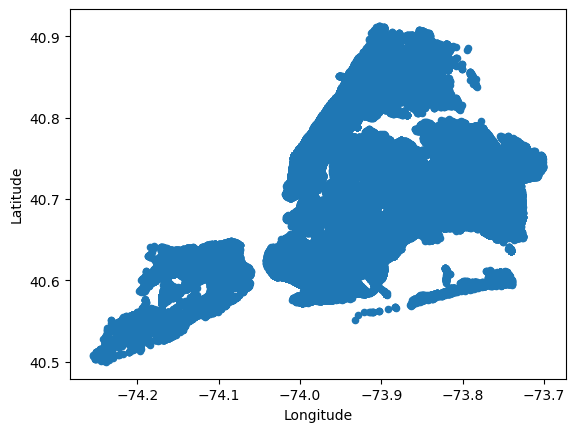

In [38]:
lat_long = df[["Latitude", "Longitude"]]
# lat_long.plot.scatter(y='Latitude', x='Longitude')
lat_long.plot(y='Latitude', x='Longitude', kind="scatter")
# df.plot(y='Latitude', x='Longitude', kind="scatter")
plt.show()

In [39]:
print(lat_long["Latitude"].min())
print(lat_long["Latitude"].max())
print(lat_long["Longitude"].min())
print(lat_long["Longitude"].max())

40.49971
40.912884
-74.25496
-73.70061


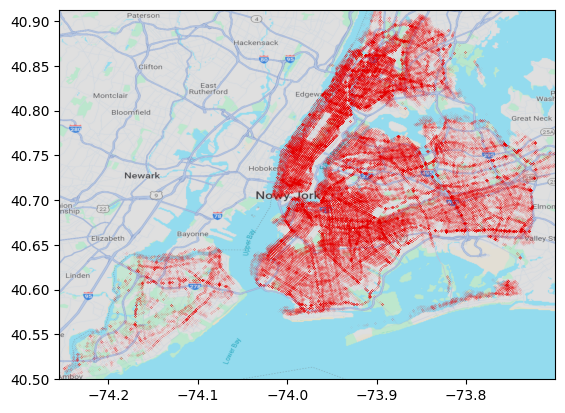

In [40]:
img = plt.imread("map.png")
fig, ax = plt.subplots() # figsize=(20, 10)
img = ax.imshow(img, extent=[-74.25496, -73.70061, 40.49971, 40.912884])
#lat_long_killed.plot.scatter(y='Latitude', x='Longitude', legend=True)
ax.scatter(lat_long["Longitude"], lat_long["Latitude"], color='red', s=0.0005, alpha=1)
plt.show()

In [47]:
lat_long_datetime = df[["Latitude", "Longitude", "DateTime"]]
lat_long_datetime["Hour"] = lat_long_datetime["DateTime"].dt.hour
print(lat_long_datetime["DateTime"].dt.time.min())
print(lat_long_datetime["DateTime"].dt.time.max())
print(lat_long_datetime.groupby(lat_long_datetime["DateTime"].dt.hour).size())
print("\n------------\n")
print(lat_long_datetime.groupby(lat_long_datetime["DateTime"].dt.hour).head())
print("\n------------\n")
print(lat_long_datetime.groupby(lat_long_datetime["DateTime"].dt.hour).first())

/tmp/ipykernel_134509/1427505440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lat_long_datetime["Hour"] = lat_long_datetime["DateTime"].dt.hour


00:00:00
23:59:00
DateTime
0      9716
1      5172
2      4240
3      3918
4      4125
5      4170
6      5728
7      7328
8     10734
9      9619
10     9417
11     9922
12    10728
13    10919
14    12587
15    13106
16    13502
17    13542
18    12304
19    10595
20     9289
21     8452
22     8056
23     7428
dtype: int64

------------

      Latitude  Longitude            DateTime  Hour
0    40.833980 -73.826350 2021-01-01 20:00:00    20
1    40.687300 -73.973656 2021-01-01 05:28:00     5
4    40.637910 -73.978640 2021-01-01 07:40:00     7
5    40.848630 -73.927620 2021-01-01 18:45:00    18
6    40.660090 -73.900550 2021-01-01 04:51:00     4
..         ...        ...                 ...   ...
265  40.752834 -74.004715 2021-01-02 11:37:00    11
273  40.737865 -74.000190 2021-01-02 15:20:00    15
278  40.846400 -73.893380 2021-01-02 11:19:00    11
279  40.787970 -73.843796 2021-01-02 13:05:00    13
287  40.631897 -74.097160 2021-01-02 13:50:00    13

[120 rows x 4 columns]

--------

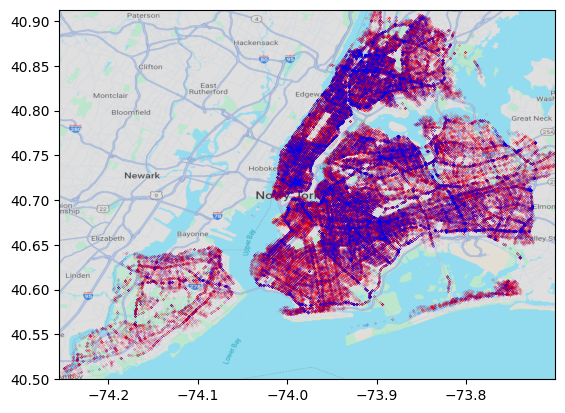

In [74]:
img = plt.imread("map.png")
fig, ax = plt.subplots() # figsize=(20, 10)
img = ax.imshow(img, extent=[-74.25496, -73.70061, 40.49971, 40.912884])
# lat_long.plot(y='Latitude', x='Longitude', column='Latitude', kind="scatter", legend=True)
# ax.scatter(lat_long_datetime["Longitude"], lat_long_datetime["Latitude"], s=0.0005, c=lat_long_datetime["Latitude"], cmap='viridis')
ax.scatter(lat_long_datetime.loc[lat_long_datetime["Hour"].between(6,20), "Longitude"], 
           lat_long_datetime.loc[lat_long_datetime["Hour"].between(6,20), "Latitude"], 
           s=0.005, 
           c='red')
ax.scatter(lat_long_datetime.loc[(lat_long_datetime["Hour"] < 6) | (lat_long_datetime["Hour"] >20), "Longitude"], 
           lat_long_datetime.loc[(lat_long_datetime["Hour"] < 6) | (lat_long_datetime["Hour"] >20), "Latitude"], 
           s=0.005, 
           c='blue')
# ax.scatter(lat_long_datetime["Longitude"], lat_long_datetime["Latitude"], s=0.0005, c='blue')
# fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(lat_long_datetime["DateTime"].min().value, 
#                                                              lat_long_datetime["DateTime"].max().value), cmap='viridis'), 
#              ax=ax, orientation='vertical', label='a colorbar label')
plt.show()